In [1]:
import warnings
warnings.filterwarnings(action='ignore') #경고 메시지 무시

In [19]:
import pandas as pd
import geopandas as gpd
import fiona

In [25]:
# CCTV CSV 로딩
df_cctv = pd.read_csv('../dataset/전국CCTV표준데이터.csv', index_col=None, header=0, 
                 names=['admin', 'addr1', 'addr2', 'usetype', 'cnt', 'pixel', 'azimuth', 'keep', 'inst_date', 'tel', 'lat', 'lon', 'up_date', 'offer_cd', 'offer'], 
                 usecols=['admin', 'addr1', 'lat', 'lon'], 
                 dtype={'admin':object, 'addr1':object, 'lat':float, 'lon':float},
                 encoding="EUC-KR")
df_cctv.head()

,admin,addr1,lat,lon
0,경상남도 김해시청,NaN,35.249247,128.871639
1,경상남도 김해시청,NaN,35.247411,128.873605
2,경상남도 김해시청,NaN,35.261728,128.874144
3,경상남도 김해시청,NaN,35.247076,128.872461
4,경상남도 김해시청,NaN,35.241185,128.877334


In [28]:
# CCTV CSV 에서 서울시 데이터만 추출
df_cctv[['lat', 'lon']].dropna() #좌표값 없는 데이터 제거
df_cctv2 = df_cctv[df_cctv['addr1'].str.contains('서울특별시')==True] 

In [30]:
# 서울시 CCTV 공간데이터화
geom_cctv = gpd.points_from_xy(df_cctv2.lon, df_cctv2.lat)
geom_cctv[0:3]

<GeometryArray>
Length: 3, dtype: geometry

In [31]:
# 좌표계 정의/변환용 라이브러리
import pyproj
from fiona.crs import from_epsg
coulumns = ['admin', 'addr1']
gdf_cctv = gpd.GeoDataFrame(df_cctv2[coulumns], geometry=geom_cctv, crs=from_epsg(4326))
#df_cctv_gdf.info()
gdf_cctv.head()

,admin,addr1,geometry
56,서울특별시 성북구청,서울특별시 성북구 돌곶이로34길 20-19,POINT (127.05113 37.61606)
57,서울특별시 성북구청,서울특별시 성북구 장위로33길 45,POINT (127.05119 37.61485)
58,서울특별시 성북구청,서울특별시 성북구 장월로5길 40,POINT (127.04720 37.60996)
59,서울특별시 성북구청,서울특별시 성북구 한천로86길 18,POINT (127.05986 37.61469)
60,서울특별시 성북구청,서울특별시 성북구 보국문로29길 51,POINT (127.00161 37.61565)


<AxesSubplot:>

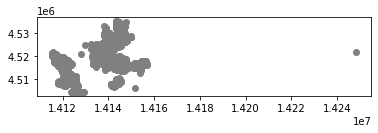

In [32]:
gdf_cctv2 = gdf_cctv.to_crs(epsg=3857)  #좌표계를 epsg 3857로 변환
gdf_cctv2.plot(color='gray')

In [33]:
#강남구 CCTV만 한번 더 추출
gdf_cctv3 = gdf_cctv2[gdf_cctv2['admin'].isin(['서울특별시 강남구청'])]

<AxesSubplot:>

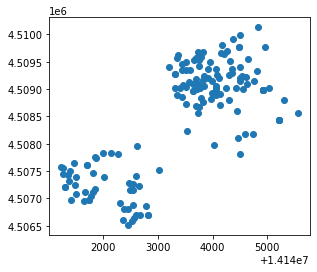

In [34]:
gdf_cctv3.plot()